In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [36]:
data = pd.read_csv('/home/bharat/Downloads/fashion-mnist_train.csv')

In [37]:
x = data.values
np.random.shuffle(x)
X = x[:, 1:].reshape(-1, 28, 28, 1)/255.0
y = x[:, 0].astype(np.int32)
k = len(set(y))

Y = tf.keras.utils.to_categorical(y, num_classes=10, dtype='int32')

In [49]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1), 
                                 filters=32, 
                                 kernel_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=300))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=k, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
r = model.fit(X, Y, epochs=15, validation_split=0.3, batch_size=32)
print('Returned:', r)


Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.5097 - acc: 0.8170 - val_loss: 0.4524 - val_acc: 0.8324
Epoch 2/15
42000/42000 [==============================] - 49s 1ms/sample - loss: 0.3620 - acc: 0.8682 - val_loss: 0.3819 - val_acc: 0.8603
Epoch 3/15
42000/42000 [==============================] - 50s 1ms/sample - loss: 0.3113 - acc: 0.8867 - val_loss: 0.5610 - val_acc: 0.8220
Epoch 4/15
42000/42000 [==============================] - 50s 1ms/sample - loss: 0.2816 - acc: 0.8965 - val_loss: 0.5248 - val_acc: 0.8254
Epoch 5/15
42000/42000 [==============================] - 58s 1ms/sample - loss: 0.2528 - acc: 0.9083 - val_loss: 0.3845 - val_acc: 0.8674
Epoch 6/15
42000/42000 [==============================] - 64s 2ms/sample - loss: 0.2313 - acc: 0.9153 - val_loss: 0.3534 - val_acc: 0.8818
Epoch 7/15
42000/42000 [==============================] - 49s 1ms/sample - loss: 0.2072 - acc: 0.9231 - val_loss: 0.

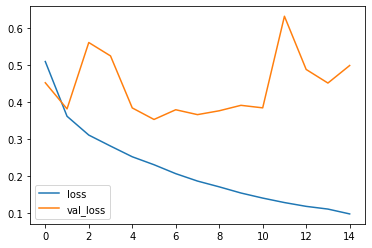

In [55]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

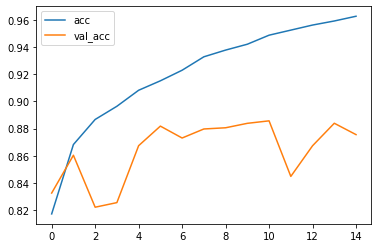

In [56]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [57]:
print(r.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [58]:
print(r.history['loss'])

[0.5096897536459424, 0.36203219443275814, 0.3113055800419478, 0.2816403397066253, 0.25277141035738443, 0.2313273102527573, 0.20721771951232637, 0.18726481168043047, 0.1716418966438089, 0.1549945402713049, 0.14133170900706735, 0.1292502491836037, 0.11899407627859286, 0.11168031811040072, 0.09861852915035117]
